### RNN Project Sentiment Analysis

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


load data

In [2]:
vocab_size =10000
max_len = 100

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

X_train = pad_sequences(X_train, maxlen = max_len, padding= "post")
X_test = pad_sequences(X_test, maxlen = max_len,padding= "post")

print(f"Training Data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing Data shape: {X_test.shape}, {y_test.shape}")

Training Data shape: (25000, 100), (25000,)
Testing Data shape: (25000, 100), (25000,)


build rnn model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN, GRU

rnn_model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 128),
    SimpleRNN(128, activation= "tanh"),
    Dense(1, activation= "sigmoid")
])

# compile the model
rnn_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# display the model summary
rnn_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Define lstm model

In [4]:
lstm_model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 128),
    LSTM(128, activation= "tanh"),
    Dense(1, activation= "sigmoid")
])

# compile the model
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# display the model summary
lstm_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

build GRU model

In [5]:
gru_model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 128),
    GRU(128, activation= "tanh"),
    Dense(1, activation= "sigmoid")
])

# compile the model
gru_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# display the model summary
gru_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train models

In [6]:
# train rnn model
history_rnn = rnn_model.fit(X_train, y_train, epochs = 10, validation_split = 0.2, verbose = 1)

# train lstm model
history_lstm = lstm_model.fit(X_train, y_train, epochs = 10, validation_split = 0.2, verbose = 1)

# train gru model
history_gru = gru_model.fit(X_train, y_train, epochs = 10, validation_split = 0.2, verbose = 1)


# evaluate models
loss_rnn , accuracy_rnn = rnn_model.evaluate(X_test, y_test, verbose = 0)
loss_lstm , accuracy_lstm = lstm_model.evaluate(X_test, y_test, verbose = 0)
loss_gru , accuracy_gru = gru_model.evaluate(X_test, y_test, verbose = 0)

print(f"RNN accuracy: {accuracy_rnn}")
print(f"GRU accuracy: {accuracy_gru}")
print(f"LSTM accuracy: {accuracy_lstm}")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.5385 - loss: 0.6834 - val_accuracy: 0.6456 - val_loss: 0.6176
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 88ms/step - accuracy: 0.7186 - loss: 0.5443 - val_accuracy: 0.6306 - val_loss: 0.6346
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.8059 - loss: 0.4107 - val_accuracy: 0.5912 - val_loss: 0.6701
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7798 - loss: 0.4477 - val_accuracy: 0.6750 - val_loss: 0.6909
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8658 - loss: 0.3083 - val_accuracy: 0.6274 - val_loss: 0.8551
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8961 - loss: 0.2401 - val_accuracy: 0.6622 - val_loss: 0.8980
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9314 - loss: 0.1641 - val_accuracy: 0.6342 - val_loss: 1.0659
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9447 - loss: 0.1258 - 

plot training accuracy

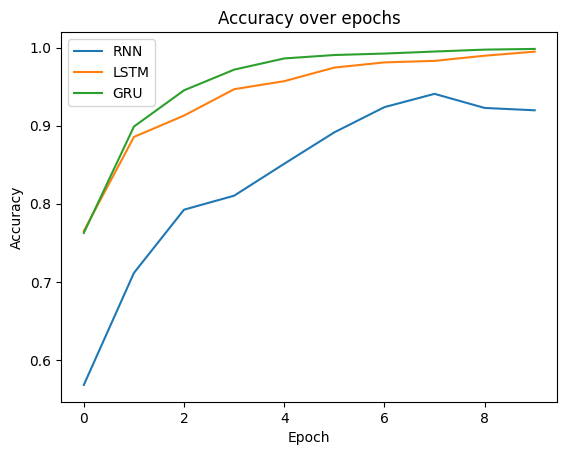

In [7]:
import matplotlib.pyplot as plt 

# plot training accuracy
plt.plot(history_rnn.history["accuracy"], label = "RNN")
plt.plot(history_lstm.history["accuracy"], label = "LSTM")
plt.plot(history_gru.history["accuracy"], label = "GRU")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over epochs")
plt.legend()
plt.show()